---
# Cairo University Faculty of Engineering
## Machine Learning 
## Assignment 2

---

Please write your full name here
- **Name** : "Nouran Khatab"

## Part 1 Simulated Data

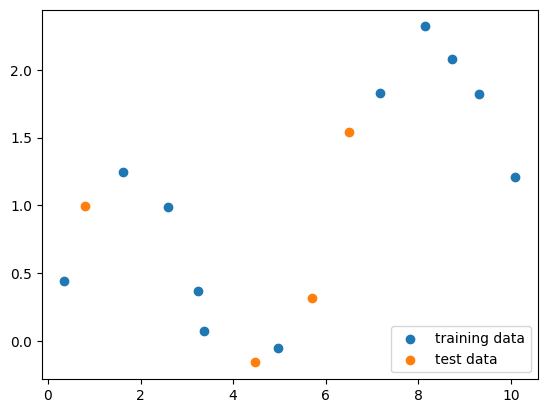

In [3]:
%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10


X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)


plt.figure()
plt.scatter(X_train, y_train, label='training data')
plt.scatter(X_test, y_test, label='test data')
plt.legend(loc=4)

### Question 1.1
- Write a function that fits a polynomial LinearRegression model on the training data X_train for degrees **1, 2, 3, 6, and 9**. (Use `PolynomialFeatures` in `sklearn.preprocessing` to create the polynomial features and then fit a linear regression model) 
- For each model, find 100 predicted values over the interval x = 0 to 10 (e.g. np.linspace(0,10,100)) and store this in a numpy array. 
- The first row of this array should correspond to the output from the model trained on degree 1, the second row degree 2, the third row degree 3, the fourth row degree 6, and the fifth row degree 9.

In [4]:
def answer_one():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    result = np.zeros((5,100)) 
    for i,degree in enumerate([1,2,3,6,9]):
        poly = PolynomialFeatures(degree=degree)
        x_poly = poly.fit_transform(X_train.reshape(-1,1))
        linreg = LinearRegression().fit(x_poly, y_train)
        y_pred = linreg.predict(poly.transform(np.linspace(0,10,100).reshape(-1,1)))
        result[i,:] = y_pred
    # your answer here
    return result # results

In [5]:
results = answer_one()
print(results.shape)

(5, 100)


In [6]:
print(results)

[[ 2.53040195e-01  2.69201547e-01  2.85362899e-01  3.01524251e-01
   3.17685603e-01  3.33846955e-01  3.50008306e-01  3.66169658e-01
   3.82331010e-01  3.98492362e-01  4.14653714e-01  4.30815066e-01
   4.46976417e-01  4.63137769e-01  4.79299121e-01  4.95460473e-01
   5.11621825e-01  5.27783177e-01  5.43944529e-01  5.60105880e-01
   5.76267232e-01  5.92428584e-01  6.08589936e-01  6.24751288e-01
   6.40912640e-01  6.57073992e-01  6.73235343e-01  6.89396695e-01
   7.05558047e-01  7.21719399e-01  7.37880751e-01  7.54042103e-01
   7.70203454e-01  7.86364806e-01  8.02526158e-01  8.18687510e-01
   8.34848862e-01  8.51010214e-01  8.67171566e-01  8.83332917e-01
   8.99494269e-01  9.15655621e-01  9.31816973e-01  9.47978325e-01
   9.64139677e-01  9.80301028e-01  9.96462380e-01  1.01262373e+00
   1.02878508e+00  1.04494644e+00  1.06110779e+00  1.07726914e+00
   1.09343049e+00  1.10959184e+00  1.12575320e+00  1.14191455e+00
   1.15807590e+00  1.17423725e+00  1.19039860e+00  1.20655995e+00
   1.22272

### Fitted model plot

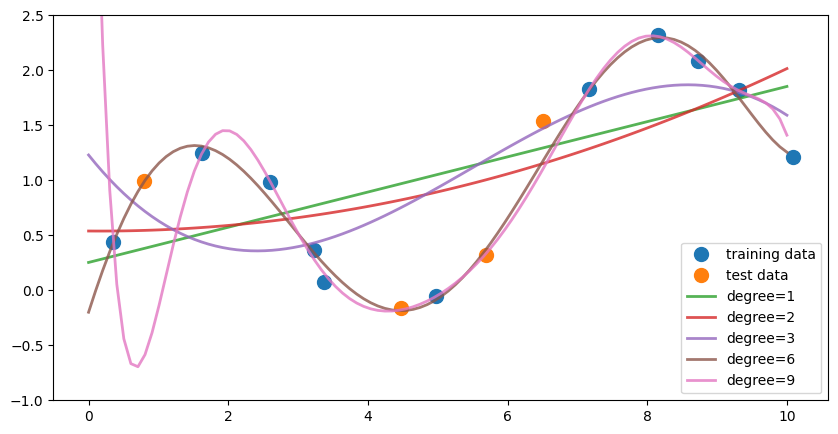

In [7]:
def plot_one(degree_predictions):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,5))
    plt.plot(X_train, y_train, 'o', label='training data', markersize=10)
    plt.plot(X_test, y_test, 'o', label='test data', markersize=10)
    for i,degree in enumerate([1,2,3,6,9]):
        plt.plot(np.linspace(0,10,100), degree_predictions[i], alpha=0.8, lw=2, label='degree={}'.format(degree))
    plt.ylim(-1,2.5)
    plt.legend(loc=4)

plot_one(answer_one())

### Question 1.2
Comment on the figure above in 2 lines in terms of fitting the data. 

**ANSWER**
We can see that the simplest 2 models (that have the degrees 1,2) doesn't bend with the data points, eighther the training nor the test data. The model that has a degree of 3 fits the data a bit more. Degree 6 does the best job to fit the data. it passes through nearly all the training points and only misses one test point. Degree 9 starts to overfit and sticking to the training points and adds unnecessary complexty (specially between 0,2 on the x axis) 

### Question 2
- Write a function that fits a polynomial `LinearRegression` model on the training data `X_train` for degrees 0 through 9. For each model compute the $R^2$ regression score on the **training data** as well as the the **test data**, and return both of these arrays in a tuple.

- *This function should return one tuple of numpy arrays `(r2_train, r2_test)`. Both arrays should have shape `(10,)`*

In [140]:
def answer_two():
    from sklearn.linear_model import LinearRegression
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.metrics import r2_score

    r2_train,r2_test = np.zeros((10,)), np.zeros((10,))
    for degree in range (0,10):
        poly = PolynomialFeatures(degree=degree)
        x_poly = poly.fit_transform(X_train.reshape(-1,1)) 
        linreg = LinearRegression().fit(x_poly, y_train)
        y_hat_train = linreg.predict(poly.transform(X_train.reshape(-1,1)))  
        y_hat_test = linreg.predict(poly.transform(X_test.reshape(-1,1))) 
        r2_train[degree] = (r2_score(y_true = y_train, y_pred = y_hat_train))
        r2_test[degree] = (r2_score(y_true = y_test, y_pred = y_hat_test))
    # your code here
    return (r2_train,r2_test)# answer here

In [9]:
results = answer_two()
print(results[0].shape,results[1].shape)

(10,) (10,)


In [10]:
print(results)

(array([0.        , 0.42924578, 0.4510998 , 0.58719954, 0.91941945,
       0.97578641, 0.99018233, 0.99352509, 0.99637545, 0.99803706]), array([-0.47808642, -0.45237104, -0.06856984,  0.00533105,  0.73004943,
        0.87708301,  0.9214094 ,  0.92021504,  0.63247953, -0.64525316]))


### Question 3
- Plot $R^2$ scores at degrees from 0 to 9 for both training and testing data on the same plot.

- The plot must contain a legend and appropriate names for the axes.

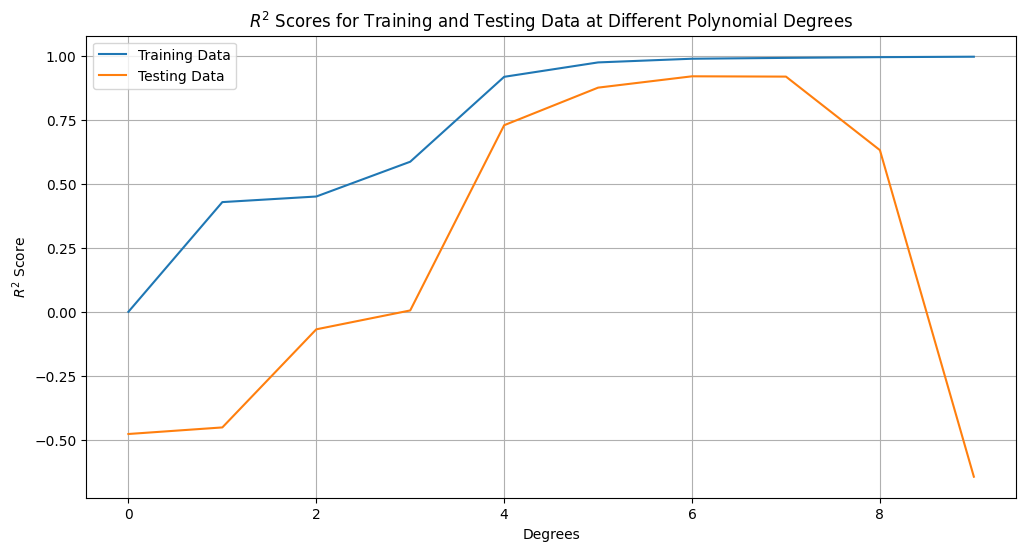

In [11]:
import matplotlib.pyplot as plt
import numpy as np

degrees = np.arange(0, 10)

plt.figure(figsize=(12,6))
plt.plot(degrees, results[0], label='Training Data')
plt.plot(degrees, results[1], label='Testing Data')
plt.xlabel('Degrees')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ Scores for Training and Testing Data at Different Polynomial Degrees')
plt.legend()
plt.grid(True)
plt.show()


Based on the $R^2$ scores (degree levels 0 through 9), what degree level corresponds to a model that is **underfitting**? What degree level corresponds to a model that is **overfitting**? What choice of degree level would provide a model with **good generalization** performance on this dataset? 

**ANSWER**

Knowing that $R^2$ represents the robustness of the model to the variance in the data and its ability to explain it, the degrees (0:5) corresponds to underfitting as $R^2$ is low for both the training and test data, and the degrees (8:9) corresponds to overfitting as $R^2$ is very high for the training data but very low for the test data. A model with degree = 6 would likely provide a model with good generalization as both the training and test $R^2$ score is high

### Question 4

- Training models on high degree polynomial features can result in overly complex models that overfit, so we often use regularized versions of the model to constrain model complexity, as we saw with Ridge and Lasso linear regression.

- For this question, train three models: a non-regularized LinearRegression model (default parameters) and a regularized Lasso Regression model (with parameters `alpha=0.01`, `max_iter=10000`), and a regularized Ridge Regression model (with parameters `alpha=0.01`, `max_iter=10000`) both on polynomial features of degree 50. 
- Return the $R^2$ score for both the LinearRegression, Lasso, Ridge model's test sets.


*This function should return one tuple `(LinearRegression_R2_test_score, Lasso_R2_test_score, Ridge_R2_test_score)`*

In [20]:
def answer_four():
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.linear_model import Lasso, LinearRegression, Ridge
    from sklearn.metrics import r2_score
    
    # your code here
    results = np.zeros((3))
    poly = PolynomialFeatures(degree=50)
    x_poly = poly.fit_transform(X_train.reshape(-1,1))
    # The non-regularized LinearRegression model
    y_hat_linreg = LinearRegression().fit(x_poly, y_train).predict(poly.transform(X_test.reshape(-1,1)))
    results[0] = r2_score(y_true = y_test, y_pred = y_hat_linreg)
    # Regularized Lasso regressor
    y_hat_lasso = Lasso(alpha=0.01, max_iter=10000).fit(x_poly, y_train).predict(poly.transform(X_test.reshape(-1,1)))
    results[1] = r2_score(y_true = y_test, y_pred = y_hat_lasso)
    # Regularized Ridge regressor
    y_hat_ridge = Ridge(alpha=0.01, max_iter=10000).fit(x_poly, y_train).predict(poly.transform(X_test.reshape(-1,1)))
    results[2] = r2_score(y_true = y_test, y_pred = y_hat_ridge)

     

    return results# results


In [23]:
results = answer_four()
print(results)


[ 0.00695407  0.8493909  -0.08938086]


c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.140e-01, tolerance: 6.895e-04
  model = cd_fast.enet_coordinate_descent(
c:\Users\nouran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_ridge.py:243: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


**Comment on the results**
- which is better? 
- what's the difference between the models in results and data fit?
- how do the weight values differ between the models?

**ANSWER**

The regularized Lasso regression achieves the best results and the linear regression model achieves the worst result due to overfitting. As for weight values, LinearRegression will probably assign large non-zero W for all features leading to redundancy. Ridge regression doesn't assign W to zero, also leading to the contribution of non relevant features. As for Lasso regression, it performs very well at feature selection, thus it assigns zero for the non relevant features and simplifies the model.

### Question 5
Write a function to calculate the total mean square error.
$$
MSE = E[ (ytrue  - yhat)^2 ] 
$$

**Then compare your results with scikit-learn implementation of mean square error on the example provided below:**

In [26]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

In [50]:
def mse(y_true, y_pred):
    ########### write code here #############
    def frequency(val,arr):
        count = 0
        for ele in arr:
            if ele == val: count +=1
        return count

    y_true_arr, y_pred_arr = np.array(y_true), np.array(y_pred)
    
    diff_sqr = (y_true_arr - y_pred_arr)**2
    # in this spicific case, the probablitiy of each element in diff_sqr, didn't work for some reason
    # prob_arr = np.array([frequency(val,diff_sqr)/len(diff_sqr) for val in diff_sqr ])
    # print(diff_sqr, prob_arr)

    error = (np.mean(diff_sqr))
    return error

# print(mse(y_true, y_pred))

0.375


In [51]:
# comparison code
from sklearn.metrics import mean_squared_error

print(mse(y_true, y_pred))
print(mean_squared_error(y_true, y_pred))

0.375
0.375


### Question 6
Implement a linear regression class **FROM SCRATCH** that can be used by one of the following three options (according to user's choice):
1. Ordinary Linear Regression Class 
2. Implement Ridge Regression Class
3. Implement Lasso Regression Class

- Can use numpy
- Complete the missing code

**Help**

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w_k := w_k -  \alpha \frac{\partial J(w,b)}{\partial w_k} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where for **LINEAR REGRESSION**
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k \tag{3}
$$
    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


You will implement a function called `update_weights` which calculates $\frac{\partial J(w)}{\partial w_k}$, $\frac{\partial J(w)}{\partial b}$ for each type of regression --> different gradients for each type 


For example for **Linear Regression**, the `updat_weights` function should:

* Iterate over the training examples, and for each example, compute:
    * The prediction of the model for that example 
    $$
    f_{wb}(x^{(i)}) =  \sum_{k=1}^{k=m}w_kx^{(i)} + b 
    $$
   
    * Loop over features $k$ and calculate the gradient for each parameter $w_k$
        $$
        \frac{\partial J(w,b)}{\partial w_k}^{(i)}  =  (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)}_k 
        $$
    * Then for $b$ from that example 
        $$
        \frac{\partial J(w,b)}{\partial b}^{(i)}  =  (f_{w,b}(x^{(i)}) - y^{(i)}) 
        $$

* Calculate the total gradient update from all the examples for each parameter $w_k$ and $b$
    $$
    \frac{\partial J(w,b)}{\partial b}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial b}^{(i)}
    $$
    
    $$
    \frac{\partial J(w,b)}{\partial w_k}  = \frac{1}{n} \sum\limits_{i = 0}^{n-1} \frac{\partial J(w,b)}{\partial w_k}^{(i)} 
    $$
  * Here, $n$ is the number of training examples and $\sum$ is the summation operator

* Then update weights

In [156]:
import numpy as np

# Linear Regression

class LinearRegression() :
    
    def __init__( self, learning_rate, iterations, type="linear" , reg_parameter = 0) :
        """
        This function initializes the object instance with arguments learning_rate, number of iterations, and whether to use linear or ridge or lasso
        reg_paramter is lambda for regularized regression"""

        self.learning_rate = learning_rate
        
        self.iterations = iterations
        
        self.type = type

        self.lam = reg_parameter
        
    def fit( self, X, Y ) :
        self.m, self.n = X.shape
        
        # weight initialization, initialize w to random numbers from a uniform distribution over [0,1(
        self.W = np.random.uniform (0, 1, size = self.n).reshape(-1,1)
        # print(self.W.shape) # (1,1)
        # intialize b to 0

        self.b = np.zeros((self.n,1))

        

        self.X = X

        
        self.Y = Y

        # gradient descent learning

        for i in range( self.iterations ) :

            self.update_weights()

        return self
    
    def update_weights( self ) :

        Y_pred = self.predict( self.X )

        # calculate gradients
        if self.type == 'linear':
            dW = np.mean(np.dot((Y_pred - self.Y) , self.X.T) )
            # print(dW) 
            
            db = np.mean(Y_pred - self.Y)
            
        elif self.type == 'ridge':
            dW = np.mean(np.dot((Y_pred - self.Y) , self.X.T))  + self.lam * self.W **2

            db = np.mean(Y_pred - self.Y)
        else: # Lasso
            dW = np.mean(np.dot((Y_pred - self.Y) , self.X.T) ) + self.lam * np.abs(self.W)

            db =  np.mean(Y_pred - self.Y)

        # update weights
        self.W = self.W - self.learning_rate * dW
        
        self.b = self.b - self.learning_rate * db

        # you don't need to return w and b
        return self

    def predict( self, X ) :
        if self.type == 'linear':
            y_pred = np.dot(X, self.W) + self.b
        elif self.type == 'ridge':
            y_pred = np.dot(X, self.W) + self.b
        else:
            y_pred = np.dot(X, self.W) + self.b
        return y_pred

- **Train your 3 models on the simulated train data provided at the beginning of the assignment**
- use alpha = 0.01, learning_rate = 0.01, iterations, 500

In [157]:
# Your code 
np.random.seed(0)
n = 15
x = np.linspace(0,10,n) + np.random.randn(n)/5
y = np.sin(x)+x/6 + np.random.randn(n)/10
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

linreg = LinearRegression(learning_rate= 0.01, iterations= 500, reg_parameter= 0.01)
# print(X_train.shape) # (11,1)
linreg.fit(X_train, y_train)


ridge = LinearRegression(learning_rate= 0.01, iterations= 500, reg_parameter= 0.01,type='ridge')
ridge.fit(X_train, y_train)


lasso = LinearRegression(learning_rate= 0.01, iterations= 500, reg_parameter= 0.01, type = 'lasso')
lasso.fit(X_train, y_train)




- **Test your 3 models on the simulated test data provided at the beginning of the assignment**
- **Print the MSE for each model**

In [158]:
# Your code here
y_pred_linreg = linreg.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

print("linreg ",mean_squared_error(y_test, y_pred_linreg), ' ridge ', mean_squared_error(y_test, y_pred_ridge), ' lasso ', mean_squared_error(y_test, y_pred_lasso))



linreg  0.6988425062884414  ridge  0.6843275488092716  lasso  0.6673266781490906


---
# Part 2 - Diabetes Data

For this assignment, you will be using the [Diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) dataset to create a regression model that can help diagnose patients' disease progression one year after baseline.


## Question 1 (1 point)

Load Diabetes Dataset from [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html#sklearn-datasets-load-diabetes)

The following function MUST:
1. Load diabetes dataset from scikit-learn as a scikit-learn bunch object which is similar to a dictionary
    - Use `scaled= False`
2. Convert the diabetes data to a pandas dataframe
3. Return a pandas dataframe with:
    - **CORRECT COLUMN NAMES** --> meaningful !!! i.e. NOT s1, s2, s3, ...
    - target column should be named "target"

In [105]:
from sklearn import datasets

def load_data():
    """
    Return a pandas dataframe    
    """
    ### BEGIN SOLUTION
    diabetes,target = datasets.load_diabetes(as_frame=True,return_X_y =True)
    
    return diabetes,target
    ### END SOLUTION

In [114]:
df,target = load_data()
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Question 2

### 2.1

Print a data description of all columns of dataframe 

use `.describe()`

In [115]:
def range_columns(df):
    """
    Function should return the drscription of dataframe
    """
    ### BEGIN SOLUTION
    return df.describe()
    
    ### END SOLUTION

In [116]:
range_columns(df)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


### 2.2

Remove all categorical features from dataframe. Function should return the new dataframe.

In [123]:
def drop_categorical(df):
    """
    Function should return the dataframe with categorical features removed
    """
    ### BEGIN SOLUTION
    df = df.select_dtypes(exclude=['object'])
    return df
    
    ### END SOLUTION

In [124]:
df = drop_categorical(df) # Although there's no categorical data

In [125]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


## Question 3

Using `train_test_split`, split `X` and `y` into training and test sets. With 80% training and 10% test.

USE `random_state=0`

In [128]:
from sklearn.model_selection import train_test_split
def split(df,target):
    """
    Function should return X_train, X_test, y_train, y_test 
    """
    ### BEGIN SOLUTION
    return train_test_split(df,target, test_size= 0.2, random_state= 0)
    
    ### END SOLUTION

In [129]:
X_train, X_test, y_train, y_test = split(df,target)

## Question 5

Use scikit-learn standard scaler to standardize training data into 0 mean and 1 std.

Function must return the normalized data and the standard scaler object

In [133]:
from sklearn import preprocessing

def standardize(data):
    """Standardize a data to 0 mean and 1 std
    Return standardized data AND the scaler object
    """
    ### BEGIN SOLUTION
    scaler = preprocessing.StandardScaler().fit(data)
    new_data = scaler.transform(data)
    # print(new_data.mean(axis=0), new_data.std(axis = 0)) # [-2.51608617e-17 -6.03860682e-17  1.00643447e-17  1.50965170e-17 1.50965170e-17  1.50965170e-17  2.51608617e-17 -3.77412926e-17 5.03217235e-18 -2.51608617e-18] [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
    return new_data, scaler
    ### END SOLUTION

In [134]:
scaled_X_train, x_scaler = standardize(X_train)##)  

- Apply the same transformation to the test data

In [137]:
scaled_X_test , _ = standardize(X_test)
scaled_y_test , _ = standardize(y_test.values.reshape(-1,1))

## Question 6

Create a scikit-learn regression model and train it on diabetes data.
Your function should return the trained model

In [138]:
from sklearn.linear_model import LinearRegression
def regression_sc(X, y):
    """Trains a linear regression model on X, y data """
    ### BEGIN SOLUTION
    linreg = LinearRegression().fit(X,y)
    return linreg
    ### END SOLUTION

In [139]:
linreg = regression_sc(scaled_X_train, y_train)
y_pred = linreg.predict(scaled_X_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))

linear model coeff (w): [ -1.721465   -11.5856942   27.51069174  14.3712086  -31.22139382
  15.26518393   1.16794747   8.18446857  35.83753415   2.12323129]
linear model intercept (b): 151.606


- Print the mse, and R2 score for the train data

In [148]:
from sklearn.metrics import r2_score

mean_squared_error(y_train,y_pred), r2_score(y_train,y_pred)

(2734.750899075742, 0.5539250081377072)

- Print the mse, and R2 score for the test data

In [152]:
y_pred_test = linreg.predict(scaled_X_test)
mean_squared_error(scaled_y_test,y_pred_test), r2_score(scaled_y_test,y_pred_test)

(26270.074475651632, -26269.074475651636)

- Comment on the results in terms of data fit

$R^2$ Score is the one that represents the data fit and it's some how low for the training dataset, but it's out of range for the test data, indicating a very poor fit of the data.